#Exploring a database of metal-poor stars
Frebel 2010, AN

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
sns.set(context='notebook',style='ticks',font='serif',palette='muted',rc={"xtick.direction":"in","ytick.direction":"in"})

:0: FutureWarning: IPython widgets are experimental and may change in the future.


Here is a table of metal-poor star chemical abundances from Anna's 2010 compilation. I removed upper limits and computed the abundances relative to solar.

In [2]:
from astropy.io import ascii
from astropy.table import Table
tab = ascii.read('frebel10.tab',fill_values=[('--','0')])
df = Table.to_pandas(tab)

In [5]:
df

,name,simbad,ke,[Li/H],[C/H],[N/H],[O/H],[Na/H],[Mg/H],[Al/H],...,[Yb/H],[Lu/H],[Hf/H],[Os/H],[Ir/H],[Pt/H],[Au/H],[Pb/H],[Th/H],[U/H]
0,HIP107975,15 Peg,NaN,NaN,NaN,NaN,NaN,-0.37,-0.38,-0.52,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,CS22497-017,22497-0017,BM,NaN,NaN,NaN,NaN,NaN,-0.54,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,CS22497-030,22497-0030,BM,NaN,NaN,NaN,NaN,NaN,-1.76,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,CS22499-057,22499-0057,BM,NaN,NaN,NaN,NaN,NaN,-1.77,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,CS22509-027,22509-0027,BM,NaN,NaN,NaN,NaN,NaN,-1.53,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,CS22517-021,22517-0021,BM,NaN,NaN,NaN,NaN,NaN,-0.84,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,CS22518-039,22518-0039,BM,NaN,NaN,NaN,NaN,NaN,-2.28,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,CS22957-022,2MASS J00014549-0549465,NaN,NaN,-2.68,-2.63,-2.19,NaN,-2.67,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,CS29503-010,2MASS J00045537-2424193,NaN,NaN,-0.03,NaN,NaN,-1.01,-0.77,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,HE0005-0002,2MASS J00080677+0014089,NaN,NaN,-2.93,NaN,NaN,NaN,-2.67,-3.48,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
print df.columns

Index([u'name', u'simbad', u'ke', u'[Li/H]', u'[C/H]', u'[N/H]', u'[O/H]',
       u'[Na/H]', u'[Mg/H]', u'[Al/H]', u'[Si/H]', u'[Ca/H]', u'[Sc/H]',
       u'[Ti/H]', u'[V/H]', u'[Cr/H]', u'[Mn/H]', u'[Fe/H]', u'[Co/H]',
       u'[Ni/H]', u'[Zn/H]', u'[Ga/H]', u'[Ge/H]', u'[Sr/H]', u'[Y/H]',
       u'[Zr/H]', u'[Nb/H]', u'[Mo/H]', u'[Ru/H]', u'[Rh/H]', u'[Pd/H]',
       u'[Ag/H]', u'[Ba/H]', u'[La/H]', u'[Ce/H]', u'[Pr/H]', u'[Nd/H]',
       u'[Sm/H]', u'[Eu/H]', u'[Gd/H]', u'[Tb/H]', u'[Dy/H]', u'[Ho/H]',
       u'[Er/H]', u'[Tm/H]', u'[Yb/H]', u'[Lu/H]', u'[Hf/H]', u'[Os/H]',
       u'[Ir/H]', u'[Pt/H]', u'[Au/H]', u'[Pb/H]', u'[Th/H]', u'[U/H]'],
      dtype='object')


In [7]:
df['ke'][pd.isnull(df['ke'])] = 'NA'
keys = np.unique(df['ke'].dropna())
for key in keys:
    print key,np.sum(df['ke']==key)
# AL and NO have only a single star in the category, so let's put just them as uncategorized
df['ke'][df['ke']=='AL'] = 'NA'
df['ke'][df['ke']=='NO'] = 'NA'
keys = np.unique(df['ke'].dropna())
print keys

/Users/alexji/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Users/alexji/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/alexji/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


AL 1
BM 51
DW 52
HB 12
NA 703
NO 1
R1 64
R2 15
RS 20
UF 17
['BM' 'DW' 'HB' 'NA' 'R1' 'R2' 'RS' 'UF']


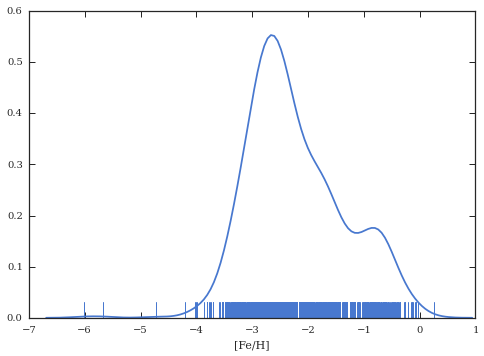

In [10]:
sns.distplot(df['[Fe/H]'].dropna(),hist=False,kde=True,rug=True)

In [13]:
my_elems = ['C','Mg','Ca','Sr','Ba','Eu']
for elem in my_elems:
    df['[{}/Fe]'.format(elem)] = df['[{}/H]'.format(elem)]-df['[Fe/H]']

/Users/alexji/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


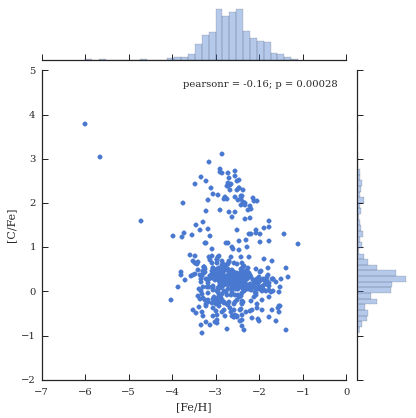

In [14]:
sns.jointplot('[Fe/H]','[C/Fe]',data=df)

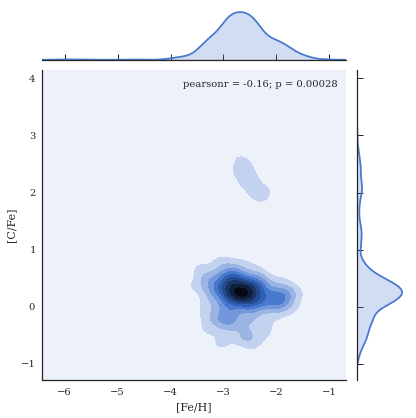

In [18]:
sns.jointplot('[Fe/H]','[C/Fe]',data=df,kind='kde')

102 834


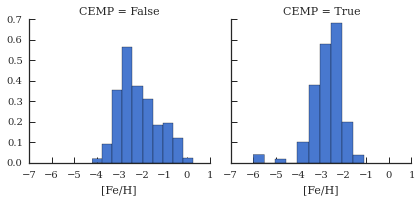

In [9]:
df['CEMP'] = df['[C/Fe]'] > 0.7
print np.sum(df['CEMP']),np.sum(~df['CEMP'])
g = sns.FacetGrid(df,col="CEMP",margin_titles=True)
g.map(plt.hist,'[Fe/H]',normed=True)

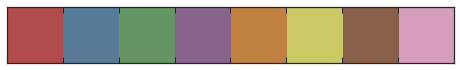

In [10]:
key_colors = sns.color_palette('Set1',len(keys),desat=.5)
sns.palplot(key_colors)

In [11]:
my_columns = ['ke','[Fe/H]']+['[{}/Fe]'.format(elem) for elem in my_elems]
df2 = df[my_columns].dropna()

['ke', '[Fe/H]', '[C/Fe]', '[Mg/Fe]', '[Ca/Fe]', '[Cr/Fe]', '[Sr/Fe]', '[Ba/Fe]', '[Eu/Fe]']


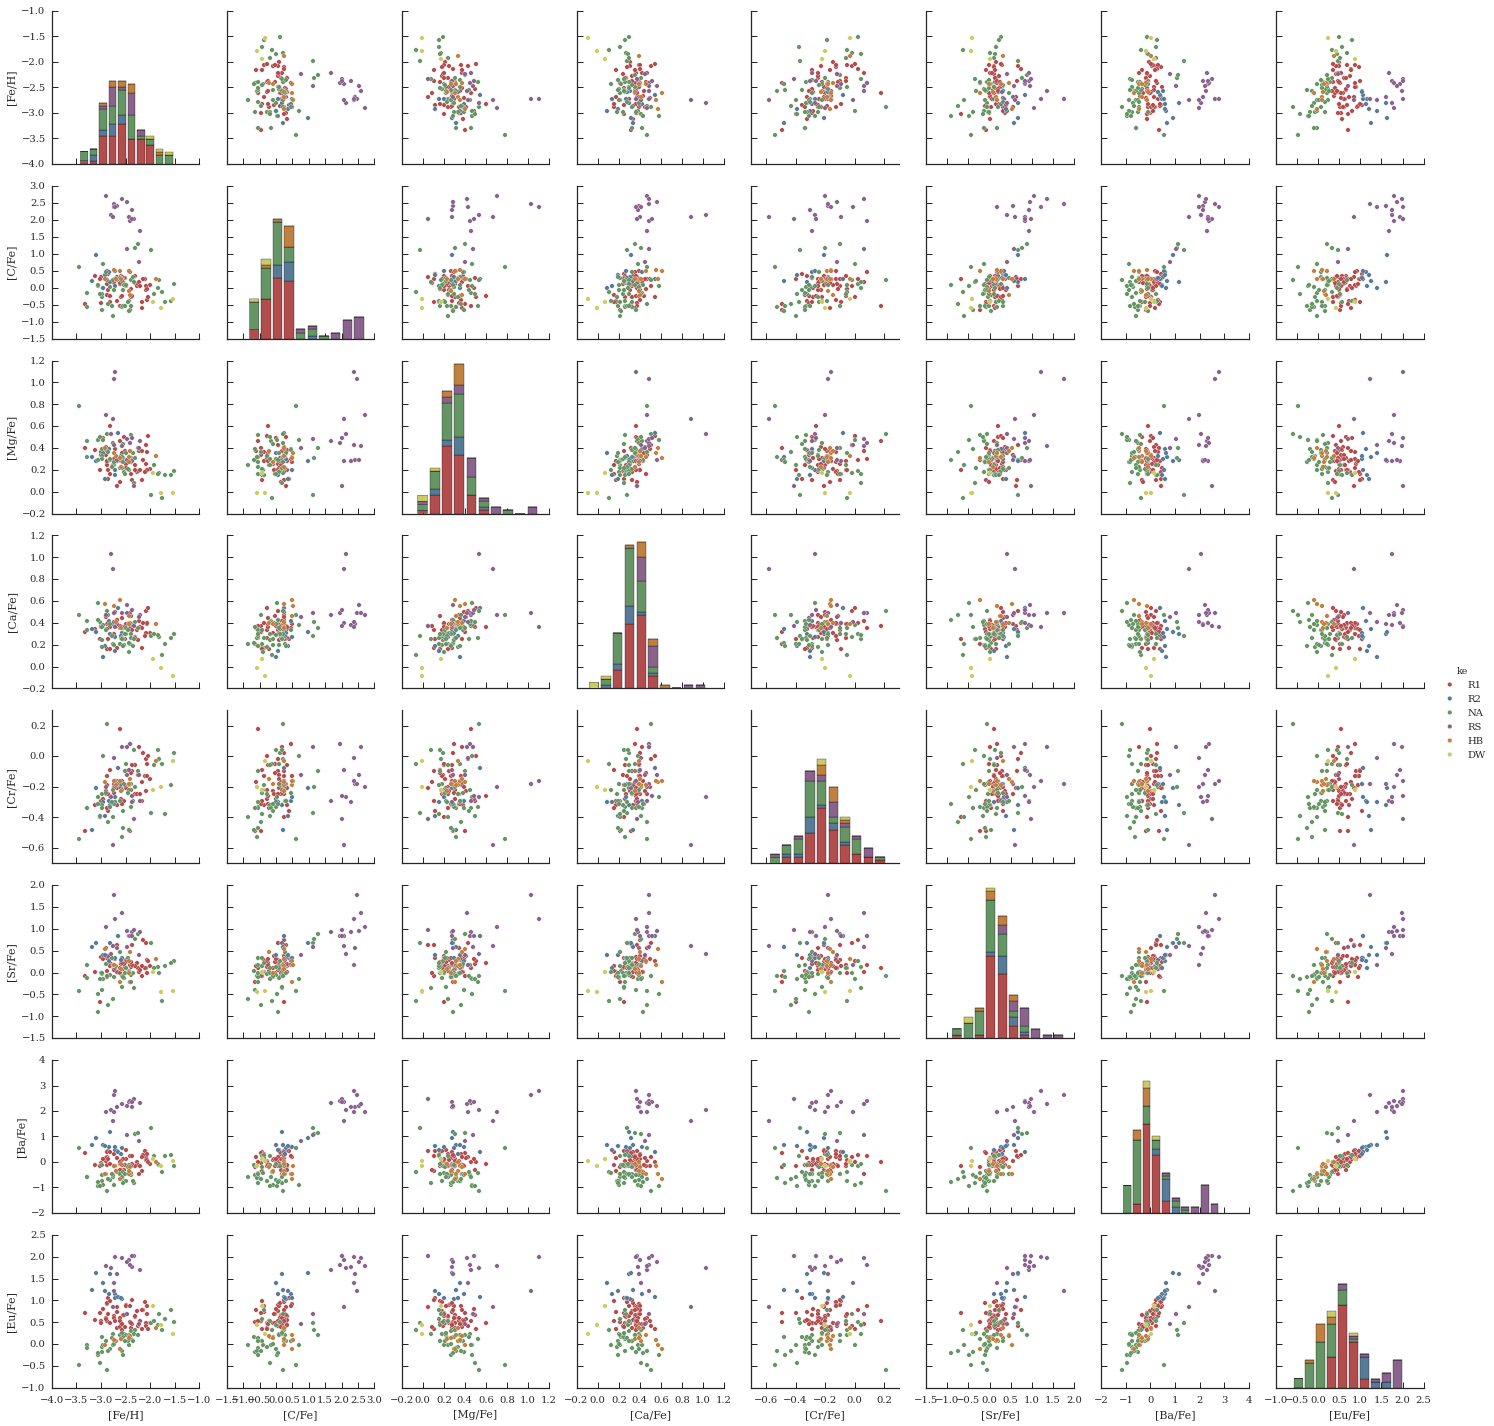

In [12]:
sns.pairplot(df2,hue='ke',palette=key_colors)